# Bandit Problem

In [11]:
# imports
from bandits import Bandit
import random
import numpy as np
import matplotlib.pyplot as plt
# Include your imports here, if any are used. 

A list of ten bandit objects initialized in the list...

In [12]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

In [13]:
bandits[0].pullLever()

-0.9615756952818939

## Greedy algorithm Implementation

In [14]:
def run_greedy(banditsin,itnum):
    # TODO: Implement the greedy algorithm here
    # Return the reward from the bandits in a list
    A=0
    R=0
    qlist=np.zeros(10, dtype=float)
    nlist=np.zeros(10, dtype=int)
    rewards=[]
    R=banditsin[0].pullLever()
    rewards.append(R)
    nlist[0]=nlist[0]+1
    qlist[A] += (R - qlist[A]) / nlist[A]
    for N in range(itnum-1) :
        # for k in range(10) :
        #     if qlist[k]==max(qlist) : A=k
        A=np.argmax(qlist)
        R=banditsin[A].pullLever()
        rewards.append(R)
        nlist[A]=nlist[A]+1
        qlist[A]=qlist[A]+(1/nlist[A])*(R-qlist[A])

    return rewards
    pass

Plot the cumulative average of rewards as the number of iterations increases.

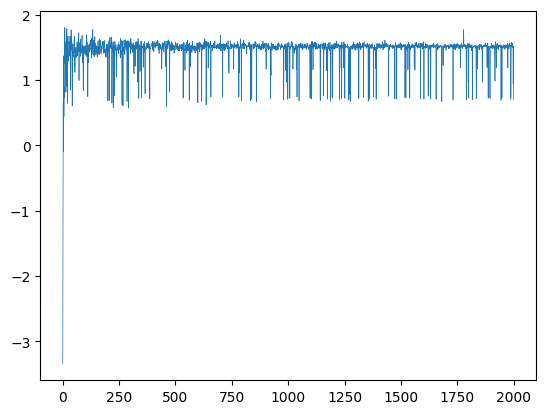

In [17]:
itnum=2000
xv = np.arange(0, (itnum+1), 1, dtype=int)
yv=np.zeros((itnum+1), dtype=float)

for i in range(0,(itnum+1),1) :
    outlist=run_greedy(bandits,i)
    outmean=np.mean(outlist)
    yv[i]=outmean

plt.plot(xv,yv,linewidth=0.5)
plt.show()

## $\epsilon$-greedy Algorithm

In [18]:
def run_epsilon_greedy(banditsin,itnum,epsilon):
    # TODO: Implement the epsilon greedy algorithm here
    # Return the reward from the bandits in a list
    A=0
    R=0
    qlist=np.zeros(10, dtype=float)
    nlist=np.zeros(10, dtype=int)
    rewards=[]
    R=banditsin[0].pullLever()
    rewards.append(R)
    nlist[0]=nlist[0]+1
    qlist[A] += (R - qlist[A]) / nlist[A]
    for N in range(itnum-1) :
        # for k in range(10) :
        #     if qlist[k]==max(qlist) : A=k
        randin=random.uniform(0,1)
        if randin>=epsilon :
            A=np.argmax(qlist)
        else :
            A=random.randint(0,9)
        R=banditsin[A].pullLever()
        rewards.append(R)
        nlist[A]=nlist[A]+1
        qlist[A]=qlist[A]+(1/nlist[A])*(R-qlist[A])

    return rewards
    pass

Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

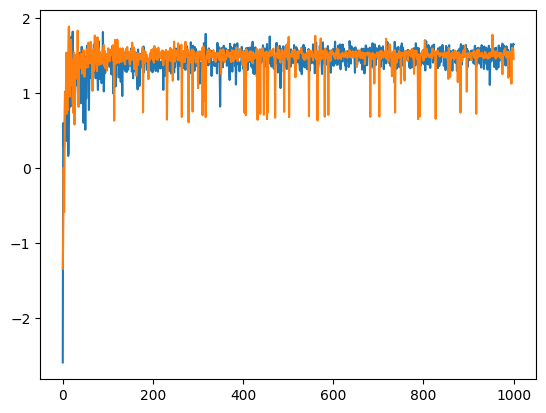

In [19]:
itnum=1000
epsilon1=0.1
epsilon2=0.001
xv = np.arange(0, (itnum+1), 1, dtype=int)
yv1=np.zeros((itnum+1), dtype=float)
yv2=np.zeros((itnum+1), dtype=float)

for i in range(0,(itnum+1),1) :
    outlist=run_epsilon_greedy(bandits,i,epsilon1)
    outmean=np.mean(outlist)
    yv1[i]=outmean

plt.plot(xv,yv1)

for i in range(0,(itnum+1),1) :
    outlist=run_epsilon_greedy(bandits,i,epsilon2)
    outmean=np.mean(outlist)
    yv2[i]=outmean

plt.plot(xv,yv2)

plt.show()

## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

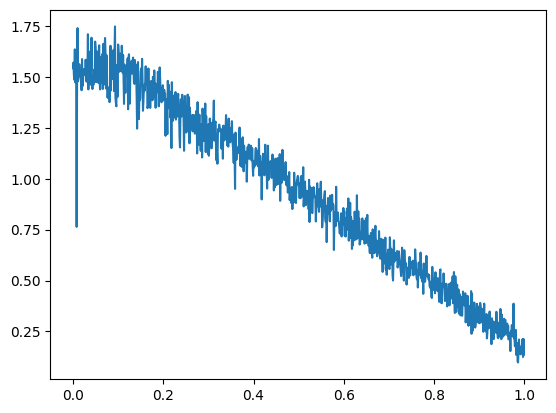

In [20]:
itnum=1000
xv = np.arange(0,1, 0.001)
yv=[]

for epsilon in xv :
    outlist=run_epsilon_greedy(bandits,itnum,epsilon)
    outmean=np.mean(outlist)
    yv.append(outmean)

plt.plot(xv,yv)

plt.show()

## Optimistic Initial Values

In [21]:
def run_optimistic_greedy(banditsin,itnum,Q):
    # TODO: Implement the optimistic greedy algorithm here

    # Return the reward from the bandits in a list
    A=0
    R=0
    qlist=[float(Q)]*10
    nlist=np.zeros(10, dtype=int)
    rewards=[]
    R=banditsin[0].pullLever()
    rewards.append(R)
    nlist[0]=nlist[0]+1
    qlist[A] += (R - qlist[A]) / nlist[A]
    for N in range(itnum-1) :
        # for k in range(10) :
        #     if qlist[k]==max(qlist) : A=k
        A=np.argmax(qlist)
        R=banditsin[A].pullLever()
        rewards.append(R)
        nlist[A]=nlist[A]+1
        qlist[A]=qlist[A]+(1/nlist[A])*(R-qlist[A])

    return rewards
    pass

Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$

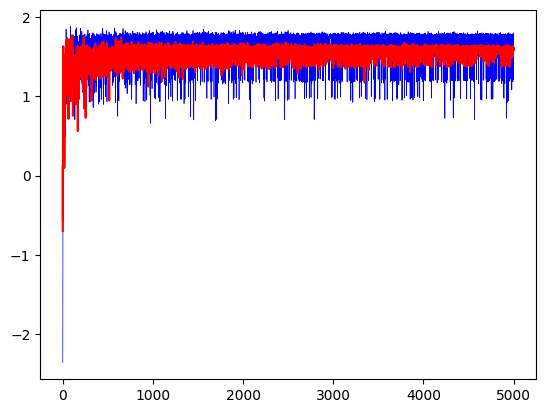

In [23]:
itnum=5000
xv = np.arange(0, (itnum+1), 1, dtype=int)
yv=np.zeros((itnum+1), dtype=float)

for i in range(0,(itnum+1),1) :
    outlist=run_optimistic_greedy(bandits,i,10)
    outmean=np.mean(outlist)
    yv[i]=outmean

plt.plot(xv,yv,linewidth=0.5,color='b')

epsilon=0.1
yvp=np.zeros((itnum+1), dtype=float)

for i in range(0,(itnum+1),1) :
    outlist=run_epsilon_greedy(bandits,i,epsilon)
    outmean=np.mean(outlist)
    yvp[i]=outmean

plt.plot(xv,yvp,color='r')

plt.show()

## Optional - Upper Confidence Bound (UCB)

In [7]:
def run_ucb(c):
    # TODO: Implement the UCB algorithm here
    # Return the reward from the bandits in a list
    pass